In [1]:
##############################################################################
# Aula de Machine Learning
# Autor: Luiz Perciliano
# Professor: Eduardo Bezerra
# Trabalho 02 - 11 de outubro de 2020
#
# Site: CEFET-RJ
# Última Atualização: 2020-10-11 22:04:35.741735
# Arquivo: ML_Trab_2.ipynb
# Ferramentas: Jupyter Notebook
##############################################################################

#  Aprendizado de Regressores

In [2]:
# Importando as bibliotecas necessárias
import os
print(os.listdir("../data/")) #entrada de arquivo de dados, diretório com arquivos a ser processado
print(os.listdir("../image/"))

import pandas as pd #algebra linear
import numpy as np #processamento de dados
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import Image
from IPython.core.display import HTML 

from math import sqrt

import datetime

['ex1data1.txt', 'ex1data2.txt', 'ex2data1.txt', 'ex2data2.txt', 'ex5data1.mat']
['plot1.1.png', 'plot1.2.png', 'plot2.1.png', 'plot3.1.png', 'plot3.10.png', 'plot3.2.png', 'plot3.3.png', 'plot3.5.png', 'plot3.7.png', 'plot3.8.png', 'plot3.9.png']


In [3]:
# Última Atualização: 
print(datetime.datetime.now())

2020-10-11 22:04:35.741735


## Regressão com uma Variável - Visualizar o gráfico de dispersão (Scatter Plot)

In [4]:
filename = 'ex1data1.txt'  # Comma Separated Values - Valores Separados Por Vírgula
path_image = '../image/'

# Carrergando dados sem cabeçalho
raw_data = pd.read_csv('../data/'+filename, header = None)
#data = pd.read_csv('../data/'+filename, header = None, names=['Exam 1', 'Exam 2', 'Admitted'])

### Conferir arquivo importado

In [5]:
raw_data.head() # leitura do dataset

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Renomear colunas

In [6]:
raw_data.columns

Int64Index([0, 1], dtype='int64')

In [7]:
raw_data.columns = ['populacao', 'lucro']
raw_data.head()

,populacao,lucro
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Verificar Informações do DataFrame

In [8]:
#verificando se tem dados nulos
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   populacao  97 non-null     float64
 1   lucro      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Resumo Estatístico de Campos Numéricos

In [9]:
raw_data.describe()

,populacao,lucro
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


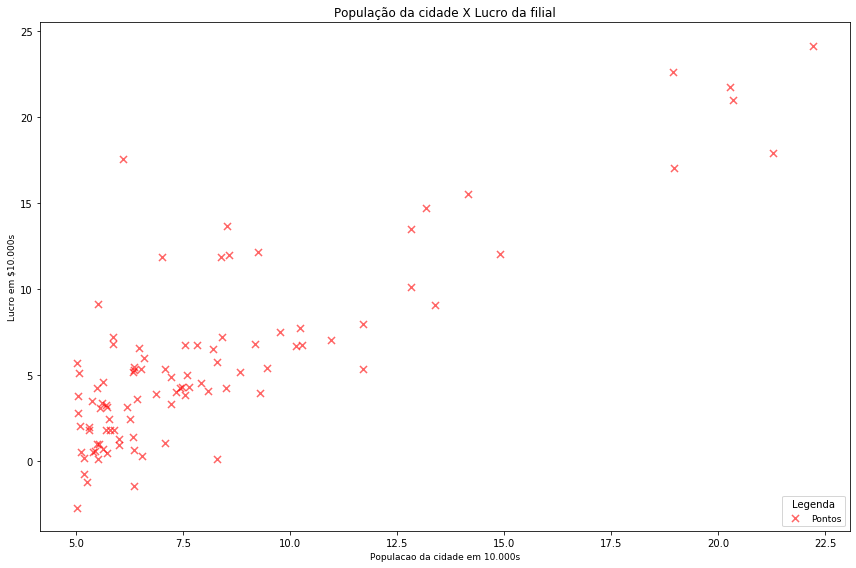

In [10]:
# gerando o grafico de dispersao para analise preliminar dos dados
# variáveis do gráfico Scatter
titulo = 'População da cidade X Lucro da filial'
eixo_x = 'Populacao da cidade em 10.000s'
eixo_y = 'Lucro em $10.000s'
image = path_image+'plot1.1.png'

#gráfico
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(raw_data['populacao'], raw_data['lucro'], color='red', marker='x', s=50, label='Pontos', alpha=0.6)

#legendas
ax.legend(title='Legenda', loc=4, fontsize=9)
ax.set_title(titulo)
ax.set_xlabel(eixo_x, fontsize=9)
ax.set_ylabel(eixo_y, fontsize=9)
#plt.grid(True) 

#salvar imagens
plt.savefig(image, dpi=300)
plt.tight_layout() ## ver se é necessário
plt.show()

### Regressão com Scikit-Learn - Algoritmo k-NN - classe KNeighborsRegressor

Criando modelos de regressão com as seguintes implementações fornecidas pela biblioteca Scikit-Learn

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 

from sklearn.model_selection import train_test_split

In [12]:
#X = ["populacao"]
#y = ["lucro"]
raw_data.head()

,populacao,lucro
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [13]:
# Declarado este valor ao cv pois se não declarar o padrão é 10
cv = 5

In [14]:
knn_regressao = KNeighborsRegressor()
knn_regressao

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [15]:
# Criação de conjuntos de treinamento e teste
train, test = train_test_split(raw_data, test_size = 0.3, random_state = 1,)

In [16]:
X_train = train["populacao"].values.reshape(-1,1)
X_test = test["populacao"].values.reshape(-1,1)

In [17]:
y_train = train["lucro"]
y_test = test["lucro"]

In [18]:
rmse_val = [] #armazenar rmse  para k diferentes
for K in range(30):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #ajuste do modelo
    pred = model.predict(X_test) # predizer o conjunto de teste
    error = sqrt(mean_squared_error(y_test,pred)) #calcula rmse
    rmse_val.append(error) #armazena rmse 
    
    print(f"O valor do RMSE para k = {K} é {error: .2f}")

O valor do RMSE para k = 1 é  4.32
O valor do RMSE para k = 2 é  3.42
O valor do RMSE para k = 3 é  3.21
O valor do RMSE para k = 4 é  2.99
O valor do RMSE para k = 5 é  3.09
O valor do RMSE para k = 6 é  3.19
O valor do RMSE para k = 7 é  3.13
O valor do RMSE para k = 8 é  3.16
O valor do RMSE para k = 9 é  3.06
O valor do RMSE para k = 10 é  2.94
O valor do RMSE para k = 11 é  3.00
O valor do RMSE para k = 12 é  2.95
O valor do RMSE para k = 13 é  2.89
O valor do RMSE para k = 14 é  2.88
O valor do RMSE para k = 15 é  2.95
O valor do RMSE para k = 16 é  2.86
O valor do RMSE para k = 17 é  2.85
O valor do RMSE para k = 18 é  2.83
O valor do RMSE para k = 19 é  2.82
O valor do RMSE para k = 20 é  2.86
O valor do RMSE para k = 21 é  2.88
O valor do RMSE para k = 22 é  2.87
O valor do RMSE para k = 23 é  2.87
O valor do RMSE para k = 24 é  2.87
O valor do RMSE para k = 25 é  2.86
O valor do RMSE para k = 26 é  2.89
O valor do RMSE para k = 27 é  2.88
O valor do RMSE para k = 28 é  2.89
O

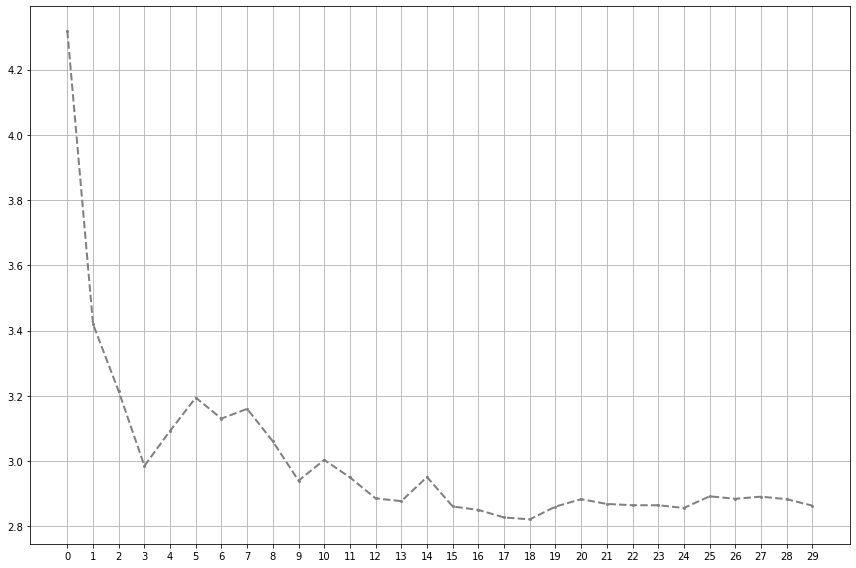

In [19]:
# Plot dos valores de rmse contra valores de k 
X = [k for k in range(30)]
y = rmse_val
image = path_image+'plot1.2.png'

fig, ax = plt.subplots(figsize=(12,8))
plt.xticks(range(len(X))) # informar apenas valores de K inteiros
plt.grid(True) # exibir o grid
plt.plot(X,y,color='gray' , marker='o', markersize=2, linestyle='--', linewidth=2)

#legendas

#salvar imagens
plt.savefig(image, dpi=300)
plt.tight_layout() ## ver se é necessário
plt.show()

Com o valor de K=1, tem se o maior valor de RMSE que,diminui conforme aumenta o valor de K. O gráfico acima demonstra K = 18.

In [20]:
knn_regressao.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [21]:
# Acurácia sem ajuste de hiperparâmetros
resultado = knn_regressao.score(X_test, y_test)
print(f"Acurácia sem ajuste de hiperparâmetro {resultado*100.0}") #.2f

Acurácia sem ajuste de hiperparâmetro 14.17674819463437


In [22]:
from sklearn.model_selection import RandomizedSearchCV

#### Usando RandomizedSearchCV

In [23]:
knr = KNeighborsRegressor()
param_grid = {'n_neighbors':[k for k in range(1,30)]}
random_regressao = RandomizedSearchCV(knr,param_grid,n_iter=15,n_jobs=-1,cv=cv, random_state=1)

In [24]:
random_regressao.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=15, n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29]},
                   pre_dispatch='2*n_jobs', random_state=1, refit=True,
                   return_train_score=False, scoring=None, verbose=0

In [25]:
random_regressao.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

In [26]:
random_regressao.best_score_

0.5024515587842487

#### Usando GridSearchCV 

In [27]:
random_regressao.best_params_

{'n_neighbors': 7}

In [28]:
knr = random_regressao.best_estimator_

In [29]:
knr.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

In [30]:
Y_pred = knr.predict(X_test)

In [31]:
resultado = knr.score(X_test, y_test)
print(f"Acurácia { resultado*100.0}") #.2f

Acurácia 12.091524023058275


In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid = {'n_neighbors': np.arange(1, 30, 1),} 
grid = GridSearchCV(knn_regressao,param_grid,cv =cv, verbose=1)

In [34]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [35]:
grid.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

In [36]:
knn_regressao = grid.best_estimator_

In [37]:
knn_regressao.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

In [38]:
resultado = knn_regressao.score(X_test, y_test)

In [39]:
print(f"Acurácia { resultado*100.0}") #.2f

Acurácia 12.091524023058275


### Algoritmo de indução de árvores de decisão - classe DecisionTreeRegressor

#### Sem ajuste de hiperparâmetros

In [40]:
model = DecisionTreeRegressor()

In [41]:
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [42]:
model.score(X_test,y_test)

-0.67286625004085

In [43]:
tree_regressao = DecisionTreeRegressor()
tree_regressao

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#### Árvore de decisão usando GridSearchCV

In [44]:
model = DecisionTreeRegressor()
model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [45]:
parameters = {'max_features': ['auto', 'log2','sqrt'],
              'max_depth': [5, 10, None],
              'criterion': ['mse', 'friedman_mse', 'mae'],
              'splitter':  ["best","random"],
              "min_samples_split" : [1,2,3]    
}

In [46]:
gscv = GridSearchCV(estimator=model,param_grid=parameters,cv=cv,n_jobs=-1,return_train_score=True)

In [47]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [5, 10, None],
                         'max_feat

In [48]:
gscv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_split': 2,
 'splitter': 'random'}

In [49]:
print(f"Os melhores parâmetros usando GridSearchCV são: {gscv.best_params_}")

Os melhores parâmetros usando GridSearchCV são: {'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'splitter': 'random'}


In [50]:
gscv.score(X_test,y_test) ###**

-0.12376783573303829

#### Árvore de decisão usando RandomizedSearchCV

In [51]:
parameters = {'max_features': ['auto', 'log2','sqrt'],
              'max_depth': [5, 10, None],
              'criterion': ['mse', 'friedman_mse', 'mae'],
              'splitter':  ["best","random"],
              "min_samples_split" : [1,2,3]
     
}

In [52]:
random_regressao = RandomizedSearchCV(model, parameters,n_iter=15,n_jobs=-1,cv=cv,random_state=1)

In [53]:
random_regressao.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [54]:
print(f"Os melhores parâmetros usando RandomizedSearchCV são: {random_regressao.best_params_} ")

Os melhores parâmetros usando RandomizedSearchCV são: {'splitter': 'random', 'min_samples_split': 3, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'mse'} 


In [55]:
random_regressao.score(X_test,y_test) ##**

-0.23083281934971137

## Regressãoo com Múltiplas Variáveis

In [56]:
## importar dados
filename = 'ex1data2.txt'

# Carrergando dados sem cabeçalho
raw_data_2 = pd.read_csv('../data/'+filename, header = None)

In [57]:
raw_data_2.head() # leitura do dataset

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [58]:
# renomear colunas
raw_data_2.columns = ['tamanho', 'numero_dormitorio', 'preco']
raw_data_2.head()

,tamanho,numero_dormitorio,preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### Normalização das características

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [61]:
raw_data_2[["tamanho","numero_dormitorio"]]

,tamanho,numero_dormitorio
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4
5,1985,4
6,1534,3
7,1427,3
8,1380,3
9,1494,3


### KNeighborsRegressor

In [62]:
#knr

In [63]:
param_grid = {'n_neighbors':[k for k in range(1,20)],'weights': ['uniform', 'distance']}
random_regressao = RandomizedSearchCV(knr,param_grid,n_iter=15,n_jobs=-1,cv=cv, random_state = 1)
train , test = train_test_split(raw_data_2, test_size = 0.3, random_state = 1,)

In [64]:
# ajustando o scaler no conjunto de treinamento
X_train_scaled = train[["tamanho","numero_dormitorio"]]
X_test_scaled  = test[["tamanho","numero_dormitorio"]]

scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [65]:
X_train = scaler.transform(X_train_scaled)
X_test = scaler.transform(X_test_scaled)

In [66]:
y_train = train["preco"]
y_test = test["preco"]

In [67]:
random_regressao.fit(X_train_scaled ,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=7,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=15, n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19],
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=1, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [68]:
# Os melhores parâmetros são:
random_regressao.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                    weights='uniform')

### Algoritmo de indução de árvores de decisão - classe DecisionTreeRegressor

In [69]:
tree_regressao = DecisionTreeRegressor()

In [70]:
random_regressao = RandomizedSearchCV(tree_regressao, parameters,n_iter=15,n_jobs=-1,cv=cv,random_state=2)

In [71]:
random_regressao.fit(X_train ,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [72]:
# Os melhores parâmetros são:
random_regressao.best_params_

{'splitter': 'random',
 'min_samples_split': 2,
 'max_features': 'auto',
 'max_depth': 5,
 'criterion': 'mse'}

# Aprendizado de classificadores

In [73]:
## importar dados
filename = 'ex2data1.txt'

# Carrergando dados sem cabeçalho
raw_data_3 = pd.read_csv('../data/'+filename, header = None)
raw_data_3.head() # leitura do dataset

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [74]:
raw_data_3.columns = ['Prova 1', 'Prova 2', 'Aprovado']
raw_data_3.head()

,Prova 1,Prova 2,Aprovado
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## Visualização dos dados

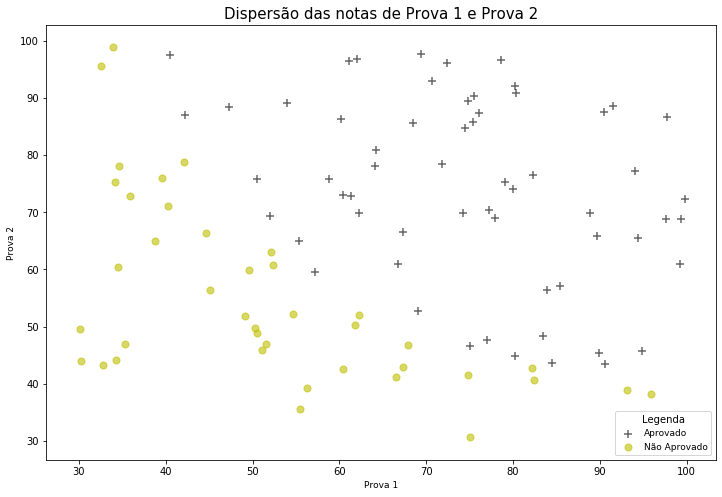

In [75]:
# gerando o grafico de dispersao para analise preliminar dos dados
# variáveis do gráfico
titulo = 'Dispersão das notas de Prova 1 e Prova 2'
eixo_x = 'Prova 1'
eixo_y = 'Prova 2'
image = path_image+'plot2.1.png'

positivo = raw_data_3[raw_data_3['Aprovado'].isin([1])]
negativo = raw_data_3[raw_data_3['Aprovado'].isin([0])]

#gráfico
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positivo['Prova 1'], positivo['Prova 2'], s=50, c='k', marker='+', label='Aprovado', alpha=0.6)
ax.scatter(negativo['Prova 1'], negativo['Prova 2'], s=50, c='y', marker='o', label='Não Aprovado', alpha=0.6)

#legendas
ax.legend(title='Legenda', loc=4, fontsize=9)
ax.set_title(titulo, fontsize=15) 
ax.set_xlabel(eixo_x, fontsize=9)
ax.set_ylabel(eixo_y, fontsize=9)
#ax.set_xlim(50,50)

#salvar imagens
plt.savefig(image, dpi=300)
#plt.tight_layout()
plt.show()

## Ajustar Modelos

In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [77]:
# CONVERTE DE DATAFRAME PARA ARRAY
# cols - criado variável com o tamanho das colunas (dimensão) do dataframe
# X recebe todos os elementos da primeira coluna (posição 0) 
# y recebe todos os elementos da segunda coluna (última posição)
# m - número de amostras de treinamento
# theta - inicia theta para rodar o gradiente
# alpha = definir um valor inicial, geralmente é 0.01

# A primeira coluna, preenchida com 1's, represenhta o theta0
raw_data_3.insert(0, 'Ones', 1)

# definir X (dados de treinamento) e y (variável de destino)
cols = raw_data_3.shape[1]
X = raw_data_3.iloc[:, 0:cols - 1]
y = raw_data_3.iloc[:, cols - 1:cols]

#X = raw_data.iloc[:, 0:2]
#y = raw_data.iloc[:, 2] # esse transforma em inteiro

m = len(y)
#theta = np.zeros([2,1])
num_iters = 400 #epochs #epochs = 400
alpha = 0.15

# Inclusão de mais um elemento de valor 1 na variável X, ou seja, aumento do axis para conter dois elementos
# O primeiro elemento será o theta0 referenciado pelo shape (posição) zero
# O segundo elemento é o próprio X "população" já existente
#X = np.c_[np.ones((X.shape[0],1)), X] # essa linha geralmente é executada linhas abaixo

# Converter em matrizes numpy e inicializar a matriz de parâmetros theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [78]:
raw_data_3

,Ones,Prova 1,Prova 2,Aprovado
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1
...,...,...,...,...
95,1,83.489163,48.380286,1
96,1,42.261701,87.103851,1
97,1,99.315009,68.775409,1
98,1,55.340018,64.931938,1


### Modelo GaussianNB

In [79]:
# Criar um classificador Gaussiano
modelo_Gaussian = GaussianNB()

In [80]:
# Treinando o modelo
modelo_Gaussian.fit(X,y.ravel()) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [81]:
#Predizendo a saída
predicted= modelo_Gaussian.predict([[1,35,77]])
print(f"O valor previsto foi: {predicted}")

O valor previsto foi: [0]


### Modelo LogisticRegression

In [82]:
modelo_log = LogisticRegression()

In [83]:
# Treinando o modelo
modelo_log.fit(X,y.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
#Predizendo a saída
predicted= modelo_log.predict([[1,35,77]])
print(f"O valor previsto foi: {predicted}")

O valor previsto foi: [0]


### Modelo KNeighborsClassifier

In [85]:
modelo_knn = KNeighborsClassifier()

In [86]:
# Treinando o modelo
modelo_knn.fit(X,y.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [87]:
#Predizendo a saída
predicted= modelo_knn.predict([[1,35,77]])
print(f"O valor previsto foi: {predicted}")

O valor previsto foi: [0]


### Modelo DecisionTreeClassifier

In [88]:
modelo_tree = DecisionTreeClassifier()

In [89]:
# Treinando o modelo
modelo_tree.fit(X,y.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [90]:
# Treinando o modelo
modelo_tree.fit(X,y.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [91]:
#Predizendo a saída
predicted= modelo_tree.predict([[1,35,77]])
print(f"O valor previsto foi: {predicted}")

O valor previsto foi: [0]


## Avaliação dos modelos

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1,stratify=y)

### GaussianNB

In [94]:
modelo_Gaussian.fit(X_train,y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [95]:
y_pred = modelo_Gaussian.predict(X_test)

In [96]:
print(f"A acurácia em teste foi de:  {accuracy_score(y_test, y_pred):.2f}")

A acurácia em teste foi de:  0.95


In [97]:
print(f"A matriz de confusão: \n\n{confusion_matrix(y_test, y_pred)}")

A matriz de confusão: 

[[ 7  1]
 [ 0 12]]


In [98]:
print(f"A classificação: \n\n{classification_report(y_test, y_pred)}")

A classificação: 

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.92      1.00      0.96        12

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



### LogisticRegression

In [99]:
modelo_log.fit(X_train,y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
y_pred = modelo_log.predict(X_test)

In [101]:
print(f"A acurácia em teste foi de:  {accuracy_score(y_test, y_pred):.2f}")

A acurácia em teste foi de:  0.90


In [102]:
print(f"A matriz de confusão: \n\n{confusion_matrix(y_test, y_pred)}")

A matriz de confusão: 

[[ 7  1]
 [ 1 11]]


In [103]:
print(f"A classificação: \n\n{classification_report(y_test, y_pred)}")

A classificação: 

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        12

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



### KNeighborsClassifier

In [104]:
modelo_knn.fit(X_train,y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [105]:
y_pred = modelo_knn.predict(X_test)

In [106]:
print(f"A acurácia em teste foi de:  {accuracy_score(y_test, y_pred):.2f}")

A acurácia em teste foi de:  0.90


In [107]:
print(f"A matriz de confusão: \n\n{confusion_matrix(y_test, y_pred)}")

A matriz de confusão: 

[[ 7  1]
 [ 1 11]]


In [108]:
print(f"A classificação: \n\n{classification_report(y_test, y_pred)}")

A classificação: 

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        12

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



### Decision Tree

In [109]:
modelo_tree.fit(X_train,y_train.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [110]:
y_pred = modelo_tree.predict(X_test)

In [111]:
print(f"A acurácia em teste foi de:  {accuracy_score(y_test, y_pred):.2f}")

A acurácia em teste foi de:  0.90


In [112]:
print(f"A matriz de confusão: \n\n{confusion_matrix(y_test, y_pred)}")

A matriz de confusão: 

[[ 6  2]
 [ 0 12]]


In [113]:
print(f"A classificação: \n\n{classification_report(y_test, y_pred)}")

A classificação: 

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.86      1.00      0.92        12

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20



## Mapeamento de características (feature mapping)

In [114]:
from sklearn.preprocessing import PolynomialFeatures

In [115]:
## importar dados
filename = 'ex2data2.txt'

# Carrergando dados sem cabeçalho
raw_data_4 = np.loadtxt('../data/'+filename,delimiter=',')
raw_data_4 # leitura do dataset

array([[ 0.051267 ,  0.69956  ,  1.       ],
       [-0.092742 ,  0.68494  ,  1.       ],
       [-0.21371  ,  0.69225  ,  1.       ],
       [-0.375    ,  0.50219  ,  1.       ],
       [-0.51325  ,  0.46564  ,  1.       ],
       [-0.52477  ,  0.2098   ,  1.       ],
       [-0.39804  ,  0.034357 ,  1.       ],
       [-0.30588  , -0.19225  ,  1.       ],
       [ 0.016705 , -0.40424  ,  1.       ],
       [ 0.13191  , -0.51389  ,  1.       ],
       [ 0.38537  , -0.56506  ,  1.       ],
       [ 0.52938  , -0.5212   ,  1.       ],
       [ 0.63882  , -0.24342  ,  1.       ],
       [ 0.73675  , -0.18494  ,  1.       ],
       [ 0.54666  ,  0.48757  ,  1.       ],
       [ 0.322    ,  0.5826   ,  1.       ],
       [ 0.16647  ,  0.53874  ,  1.       ],
       [-0.046659 ,  0.81652  ,  1.       ],
       [-0.17339  ,  0.69956  ,  1.       ],
       [-0.47869  ,  0.63377  ,  1.       ],
       [-0.60541  ,  0.59722  ,  1.       ],
       [-0.62846  ,  0.33406  ,  1.       ],
       [-0

In [116]:
X = raw_data_4[:,:-1]
y = raw_data_4[:,-1]

In [117]:
#X

In [118]:
poly = PolynomialFeatures(6)
poly

PolynomialFeatures(degree=6, include_bias=True, interaction_only=False,
                   order='C')

In [119]:
modelo_log = LogisticRegression()

In [120]:
a_poly = poly.fit_transform(X)
a_poly

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

In [121]:
X_train, X_test, y_train, y_test = train_test_split(a_poly,y, test_size = 0.2, random_state = 1,stratify=y)

In [122]:
modelo_log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [123]:
y_pred = modelo_log.predict(X_test)

In [124]:
print(f"A acurácia em teste foi de:  {accuracy_score(y_test, y_pred):.2f}")

A acurácia em teste foi de:  0.88


In [125]:
print(f"A classificação: \n\n{classification_report(y_test, y_pred)}")

A classificação: 

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88        12
         1.0       0.91      0.83      0.87        12

    accuracy                           0.88        24
   macro avg       0.88      0.88      0.87        24
weighted avg       0.88      0.88      0.87        24



## Esboço da Fronteira de Decisão

In [126]:
raw_data_4

array([[ 0.051267 ,  0.69956  ,  1.       ],
       [-0.092742 ,  0.68494  ,  1.       ],
       [-0.21371  ,  0.69225  ,  1.       ],
       [-0.375    ,  0.50219  ,  1.       ],
       [-0.51325  ,  0.46564  ,  1.       ],
       [-0.52477  ,  0.2098   ,  1.       ],
       [-0.39804  ,  0.034357 ,  1.       ],
       [-0.30588  , -0.19225  ,  1.       ],
       [ 0.016705 , -0.40424  ,  1.       ],
       [ 0.13191  , -0.51389  ,  1.       ],
       [ 0.38537  , -0.56506  ,  1.       ],
       [ 0.52938  , -0.5212   ,  1.       ],
       [ 0.63882  , -0.24342  ,  1.       ],
       [ 0.73675  , -0.18494  ,  1.       ],
       [ 0.54666  ,  0.48757  ,  1.       ],
       [ 0.322    ,  0.5826   ,  1.       ],
       [ 0.16647  ,  0.53874  ,  1.       ],
       [-0.046659 ,  0.81652  ,  1.       ],
       [-0.17339  ,  0.69956  ,  1.       ],
       [-0.47869  ,  0.63377  ,  1.       ],
       [-0.60541  ,  0.59722  ,  1.       ],
       [-0.62846  ,  0.33406  ,  1.       ],
       [-0

In [127]:
from sklearn.pipeline import make_pipeline 

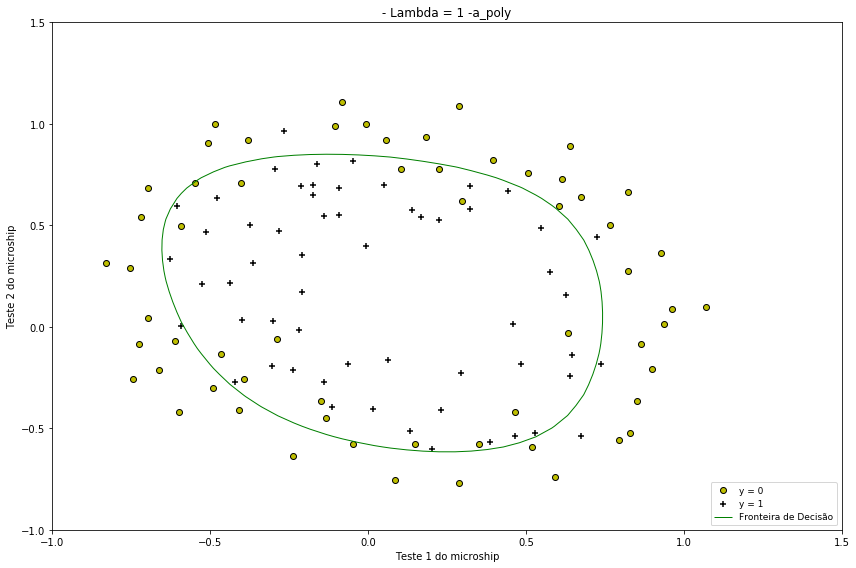

In [128]:
# variáveis do gráfico
image = path_image+'plot2.1.png'

eixo_x = 'Teste 1 do microship'
eixo_y = 'Teste 2 do microship'

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[y==0,0],X[y==0,1],c='y',marker='o', label='y = 0', edgecolors='k')
           
ax.scatter(X[y==1,0],X[y==1,1],c='k',marker='+', label='y = 1')
plt.xlabel('Teste 1 do microship')
plt.ylabel('Teste 2 do microship')

handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels);

clf = make_pipeline(PolynomialFeatures(6), LogisticRegression())
clf.fit(X,y)
x1 = np.linspace(-1,1.5,50)
x2 = np.linspace(-1,1.5,50)
XX1, XX2 = np.meshgrid(x1,x2)
Z = clf.predict_proba(np.array([XX1.ravel(), XX2.ravel()]).T)[:,1]
Z = Z.reshape(XX1.shape)
CS = ax.contour(XX1, XX2, Z, levels=[0.5], colors='g', linewidths=1)
artists = CS.legend_elements()
handles.extend(artists[0])
labels.extend(['Fronteira de Decisão'])

#legendas
ax.legend(handles[0:3],labels[0:3],loc=4, fontsize=9)
#ax.legend(title='Legenda',loc=4, fontsize=9)
ax.title.set_text(' - Lambda = 1 -a_poly ')

#salvar imagens
plt.savefig(image, dpi=300)
plt.tight_layout() ## ver se é necessário
plt.show()

# Regularização

In [129]:
from scipy.io import loadmat

In [130]:
## importar dados
filename = 'ex5data1.mat'

# Carrergando dados sem cabeçalho
raw_data_5 = loadmat('../data/'+filename,squeeze_me=True)
#np.loadtxt('../data/'+filename,delimiter=',')
raw_data_5 # leitura do dataset

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Nov  4 22:27:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([-15.93675813, -29.15297922,  36.18954863,  37.49218733,
        -48.05882945,  -8.94145794,  15.30779289, -34.70626581,
          1.38915437, -44.38375985,   7.01350208,  22.76274892]),
 'y': array([ 2.13431051,  1.17325668, 34.35910918, 36.83795516,  2.80896507,
         2.12107248, 14.71026831,  2.61418439,  3.74017167,  3.73169131,
         7.62765885, 22.7524283 ]),
 'Xtest': array([-33.31800399, -37.91216403, -51.20693795,  -6.13259585,
         21.26118327, -40.31952949, -14.54153167,  32.55976024,
         13.39343255,  44.20988595,  -1.14267768, -12.76686065,
         34.05450539,  39.22350028,   1.97449674,  29.6217551 ,
        -23.66962971,  -9.01180139, -55.94057091, -35.70859752,
          9.51020533]),
 'ytest': array([ 3.31688953,  5.39768952,  0.13042984,  6.1925982 , 17.08848712,
         0.79950805,  2.82479183, 28.621

In [131]:
ytrain = raw_data_5['y']
Xtrain = np.c_[np.ones_like(raw_data_5['X']), raw_data_5['X']]

yval = raw_data_5['yval']
Xval = np.c_[np.ones_like(raw_data_5['Xval']), raw_data_5['Xval']]

In [132]:
print('Xtrain:', Xtrain.shape)
print('ytrain:', ytrain.shape)
print('Xval:', Xval.shape)
print('yval:', yval.shape)

Xtrain: (12, 2)
ytrain: (12,)
Xval: (21, 2)
yval: (21,)


In [133]:
Xtest = np.c_[np.ones_like(raw_data_5['Xtest']), raw_data_5['Xtest']]
ytest = raw_data_5["ytest"]

## Visualização dos Dados

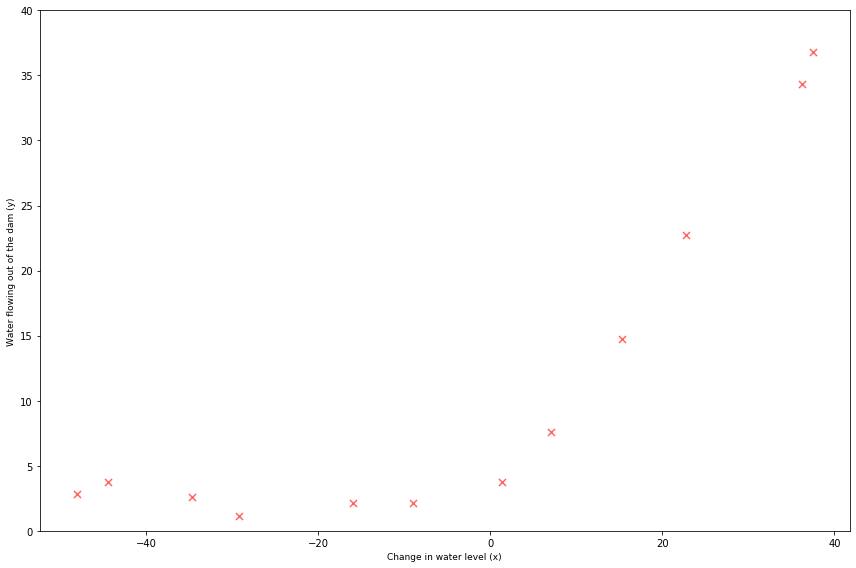

In [134]:
# Dados do conjunto de treinamento

#variáveis do gráfico
#titulo = ''
eixo_x = 'Change in water level (x)'
eixo_y = 'Water flowing out of the dam (y)'
image = path_image+'plot3.1.png'

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(Xtrain[:,1], ytrain, s=50, color='red', marker='x', linewidths=1, alpha=0.6) 
ax.set_xlabel(eixo_x, fontsize=9)
ax.set_ylabel(eixo_y, fontsize=9)
#plt.grid(True) 
plt.ylim(ymin=0, ymax = 40);

#salvar imagens
plt.savefig(image, dpi=300)
plt.tight_layout() ## ver se é necessário
plt.show()

## Ajuste de um regressor linear

In [135]:
from sklearn.linear_model import LinearRegression

In [136]:
linear = LinearRegression()

In [137]:
linear.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
linear.score(Xtest,ytest)

0.6771806035144312

In [139]:
linear.coef_

array([0.        , 0.36777923])

In [140]:
linear.intercept_

13.08790351086908

In [141]:
# Plotando a linha de regressão:
yhat = linear.intercept_ + linear.coef_ * Xtrain

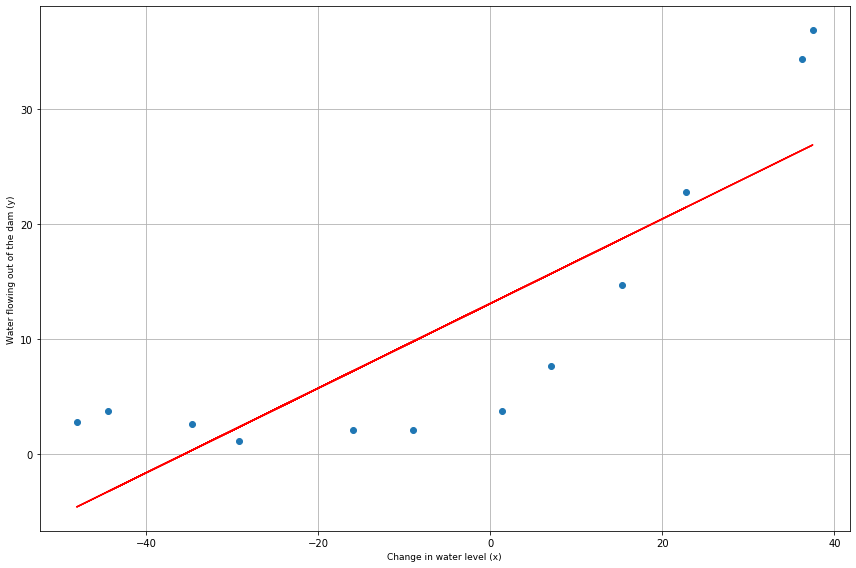

In [142]:
#variáveis do gráfico
#titulo = ''
eixo_x = 'Change in water level (x)'
eixo_y = 'Water flowing out of the dam (y)'
image = path_image+'plot3.2.png'

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(raw_data_5['X'],ytrain)
plt.plot(Xtrain,yhat, c= 'red')

ax.set_xlabel(eixo_x, fontsize=9)
ax.set_ylabel(eixo_y, fontsize=9)

plt.grid(True) 

#salvar imagens
plt.savefig(image, dpi=300)
plt.tight_layout() ## ver se é necessário
plt.show()

### Analisando os resultados

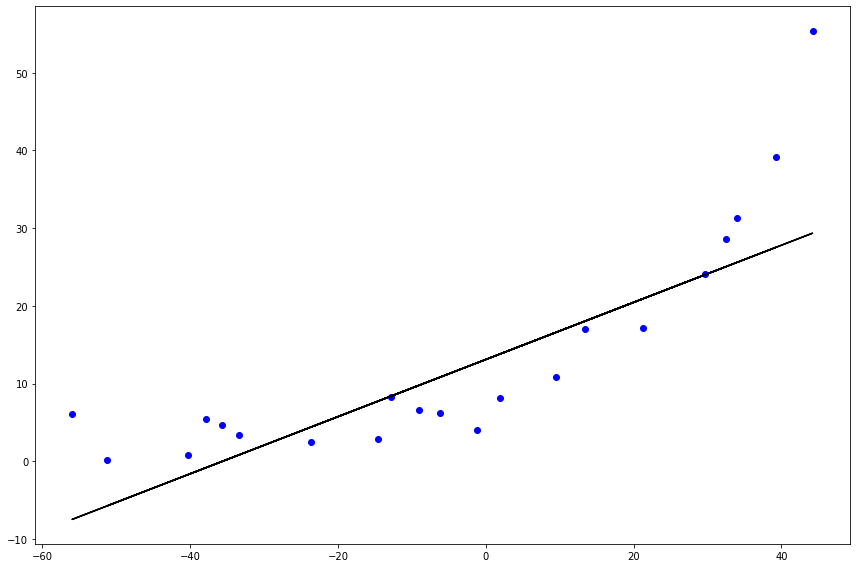

In [143]:
#variáveis do gráfico Scatter
#titulo = ''
#eixo_x = ''
#eixo_y = ''
image = path_image+'plot3.3.png'

ypred = linear.predict(Xtest) 
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(raw_data_5['Xtest'], ytest, color ='b') 
plt.plot(raw_data_5['Xtest'], ypred, color ='k') 

#salvar imagens
plt.savefig(image, dpi=300)
plt.tight_layout() ## ver se é necessário
plt.show()

## Curvas de aprendizado

In [144]:
import scipy.io as spio

from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

In [145]:
## importar dados
filename = 'ex5data1.mat'

# Carrergando dados
raw_data_5_1 = spio.loadmat('../data/'+filename,squeeze_me=True)

X, y = raw_data_5_1['X'], raw_data_5_1['y']
Xtest, ytest = raw_data_5_1['Xtest'], raw_data_5_1['ytest']
Xval, yval = raw_data_5_1['Xval'], raw_data_5_1['yval']

raw_data_5_1 # leitura do dataset

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Nov  4 22:27:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([-15.93675813, -29.15297922,  36.18954863,  37.49218733,
        -48.05882945,  -8.94145794,  15.30779289, -34.70626581,
          1.38915437, -44.38375985,   7.01350208,  22.76274892]),
 'y': array([ 2.13431051,  1.17325668, 34.35910918, 36.83795516,  2.80896507,
         2.12107248, 14.71026831,  2.61418439,  3.74017167,  3.73169131,
         7.62765885, 22.7524283 ]),
 'Xtest': array([-33.31800399, -37.91216403, -51.20693795,  -6.13259585,
         21.26118327, -40.31952949, -14.54153167,  32.55976024,
         13.39343255,  44.20988595,  -1.14267768, -12.76686065,
         34.05450539,  39.22350028,   1.97449674,  29.6217551 ,
        -23.66962971,  -9.01180139, -55.94057091, -35.70859752,
          9.51020533]),
 'ytest': array([ 3.31688953,  5.39768952,  0.13042984,  6.1925982 , 17.08848712,
         0.79950805,  2.82479183, 28.621

In [146]:
lin_reg = LinearRegression()
X = X[:, np.newaxis]
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
from sklearn.model_selection import KFold

def plot_learning_curve(estimator, title, X, y, train_sizes=np.linspace(0.1, 1, 8)):
  cv = KFold(n_splits=10, shuffle=True, random_state=42)
  train_sizes, train_scores, test_scores = learning_curve(estimator, X, y,
                                                          train_sizes = train_sizes,cv=cv,
                                                          scoring='neg_root_mean_squared_error')
  train_scores, test_scores = -train_scores, -test_scores
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  plt.grid()
  plt.xticks(train_sizes)
  plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                          train_scores_mean + train_scores_std, alpha=0.1,
                          color="r")
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                          test_scores_mean + test_scores_std, alpha=0.1,
                          color="g")
  plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                  label="Treino")
  plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                  label="Validação Cruzada")
  plt.legend(loc='best')
  plt.xlabel('Número de exemplos de treinamento')
  plt.ylabel('Erro')
  plt.title(title)
  return plt

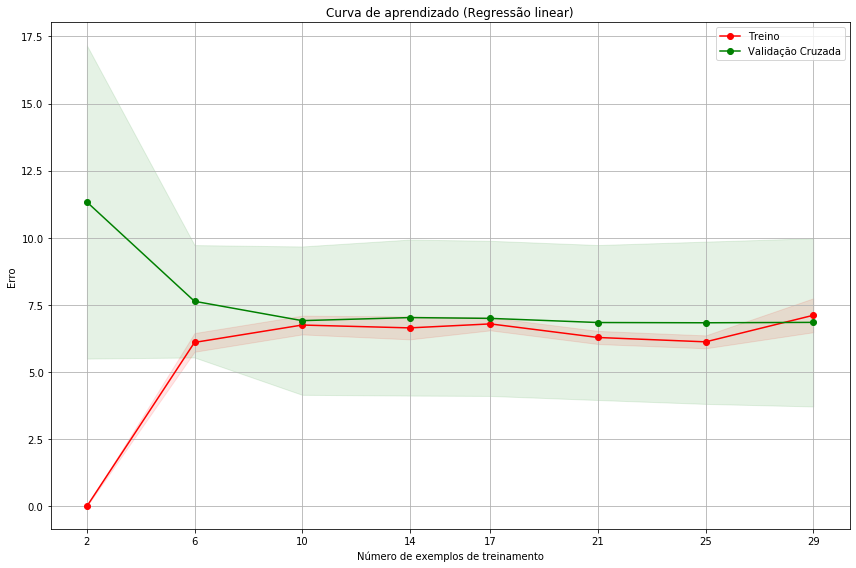

In [148]:
# A função "learning_curve()" implementa apenas K-Fold - X e Xval serão concatenados
X_combined = np.hstack((X[:,0], Xval))
y_combined = np.hstack((y, yval))
X_combined = X_combined[:, np.newaxis]

fig, ax = plt.subplots(figsize=(12,8))
plot_learning_curve(lin_reg, 'Curva de aprendizado (Regressão linear)', X_combined, y_combined)

image = path_image+'plot3.5.png'
#salvar imagens
plt.savefig(image, dpi=300)
plt.tight_layout() ## ver se é necessário
plt.show()

## Ajuste de um regressor polinomial não-regularizado

In [149]:
linear = LinearRegression()

In [150]:
scaler = StandardScaler()

In [151]:
# Ajuste do scaler com o conjunto de treinamento
scaler.fit(raw_data_5_1["X"].reshape(-1,1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [152]:
X_train_scaled = scaler.transform(raw_data_5_1["X"].reshape(-1,1))
X_test_scaled = scaler.transform(raw_data_5_1["Xtest"].reshape(-1,1))

In [153]:
poly = PolynomialFeatures(8)
poly

PolynomialFeatures(degree=8, include_bias=True, interaction_only=False,
                   order='C')

In [154]:
X_poly_train = poly.fit_transform(X_train_scaled)
X_poly_test = poly.transform(X_test_scaled)

In [155]:
linear.fit(X_poly_train,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [156]:
linear.score(X_poly_train,ytrain)

0.9996297877703565

In [157]:
linear.score(X_poly_test,ytest)

0.8299783544768009

In [158]:
linear.coef_

array([  0.        ,   3.6637907 ,  10.75857046,  17.67751496,
         2.71614071, -14.15489146,  -4.3307097 ,   3.50768901,
         1.13839544])

In [159]:
linear.intercept_

2.5266727401162417

In [160]:
X_poly_train.shape

(12, 9)

In [161]:
ytrain.shape

(12,)

In [162]:
raw_data_5_1["X"].shape

(12,)

In [163]:
Xtrain.shape

(12, 2)

### Plotando a linha de regressão

In [164]:
## importar dados
filename = 'ex5data1.mat'

# Carrergando dados
raw_data_5_2 = spio.loadmat('../data/'+filename,squeeze_me=True)

In [165]:
X, y = raw_data_5_2['X'], raw_data_5_2['y']
Xtest, ytest = raw_data_5_2['Xtest'], raw_data_5_2['ytest']
Xval, yval = raw_data_5_2['Xval'], raw_data_5_2['yval']

lin_reg = make_pipeline(PolynomialFeatures(8), StandardScaler(), LinearRegression())
X = X[:, np.newaxis]
lin_reg.fit(X,y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=8, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

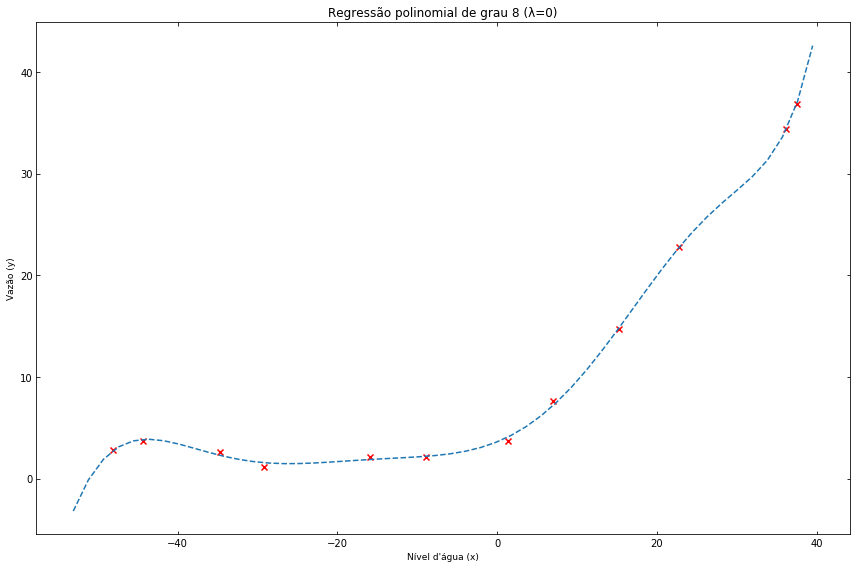

In [166]:
#variáveis do gráfico
titulo = 'Regressão polinomial de grau 8 (\u03BB=0)'
eixo_x = 'Nível d\'água (x)'
eixo_y = 'Vazão (y)'
image = path_image+'plot3.7.png'

fig, ax = plt.subplots(figsize=(12,8))
t = np.linspace(X[:,0].min()-5, X[:,0].max()+2,50)
plt.plot(t, lin_reg.predict(t[:,np.newaxis]), '--')
plt.scatter(X[:,0], y, c='r', marker='x')
ax.set_title(titulo)
ax.set_xlabel(eixo_x, fontsize=9)
ax.set_ylabel(eixo_y, fontsize=9)

plt.tick_params(top=True, right=True,direction='in')

#salvar imagens
plt.savefig(image, dpi=300)
plt.tight_layout() ## ver se é necessário
plt.show()

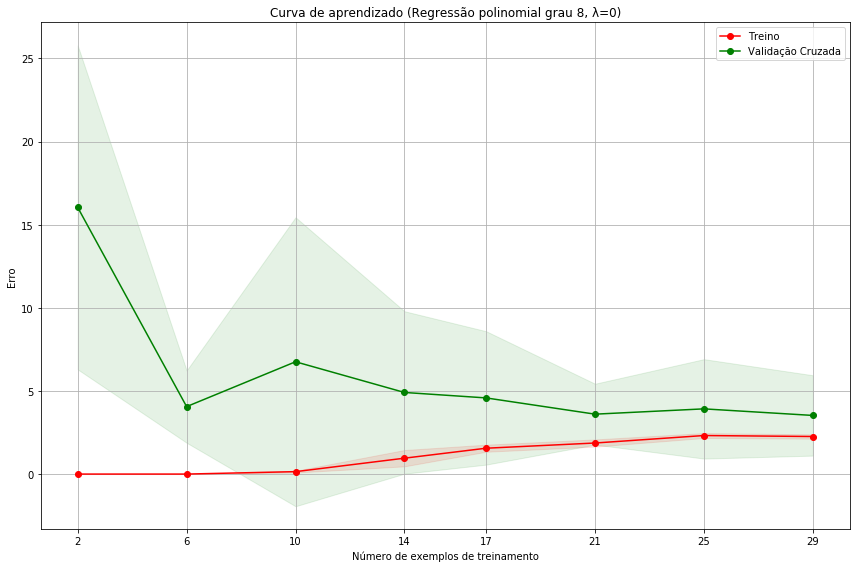

In [167]:
#variáveis do gráfico
#titulo = ''
#eixo_x = ''
#eixo_y = ''
image = path_image+'plot3.8.png'

fig, ax = plt.subplots(figsize=(12,8))
plot_learning_curve(lin_reg, 'Curva de aprendizado (Regressão polinomial grau 8, \u03BB=0)',
                    X_combined, y_combined, train_sizes=np.linspace(0.1, 1, 8))

#salvar imagens
plt.savefig(image, dpi=300)
plt.tight_layout() ## ver se é necessário
plt.show()

## Ajuste de um regressor polinomial regularizado

In [168]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

### Ridge

In [169]:
rdg = Ridge(alpha = 1)
poly = PolynomialFeatures(8)

In [170]:
X_poly_train = poly.fit_transform(X_train_scaled)
X_poly_test = poly.transform(X_test_scaled)

In [171]:
rdg.fit(X_poly_train,ytrain)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [172]:
rdg.score(X_poly_train,ytrain)

0.9823636941978275

In [173]:
rdg.score(X_poly_test,ytest)

0.6733111698843277

#### Ajuste do hiperparâmetro alpha

In [174]:
cv = 10
yval = raw_data_5_2['yval']
Xval = raw_data_5_2["Xval"]

In [175]:
X_val_scaled = scaler.transform(Xval.reshape(-1,1))
X_poly_val = poly.fit_transform(X_val_scaled)
parameters = {'alpha':[0,0.1,0.2,0.3,0.4,0.5,0.51,0.54,1, 100]}
Ridge_reg= GridSearchCV(rdg, parameters, scoring='neg_mean_squared_error',cv=cv)

In [176]:
Ridge_reg.fit(X_poly_val,yval)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.51, 0.54, 1,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [177]:
print(f" O melhor estimador do valor de Alpha: \n\n{Ridge_reg.best_estimator_}")

 O melhor estimador do valor de Alpha: 

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [178]:
best_model = Ridge_reg.best_estimator_
best_model.fit(X_poly_train,ytrain)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [179]:
best_model.score(X_poly_train,ytrain)

0.9823636941978275

In [180]:
best_model.score(X_poly_test,ytest)

0.6733111698843277

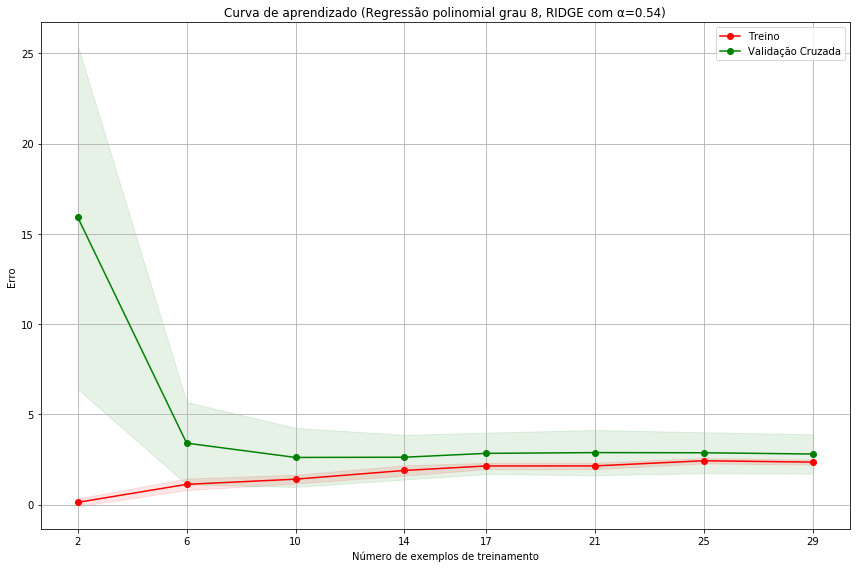

In [181]:
#variáveis do gráfico
#titulo = ''
#eixo_x = ''
#eixo_y = ''
image = path_image+'plot3.9.png'

ridge_reg = make_pipeline(PolynomialFeatures(8), StandardScaler(), Ridge())
param_grid = {'ridge__alpha': np.logspace(-4,3,16)}
cv = KFold(n_splits=10, shuffle=True, random_state=42)
grid= GridSearchCV(ridge_reg,param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')
grid.fit(X_combined,y_combined)

Lambda = grid.best_params_['ridge__alpha']
ridge = grid.best_estimator_
fig, ax = plt.subplots(figsize=(12,8))
plot_learning_curve(ridge,
                    'Curva de aprendizado (Regressão polinomial grau 8, RIDGE com \u03B1={:.2f})'.format(Lambda),
                    X_combined, y_combined, train_sizes=np.linspace(0.1, 1, 8))


#salvar imagens
plt.savefig(image, dpi=300)
plt.tight_layout() ## ver se é necessário
plt.show()

### Lasso

In [182]:
lasso = Lasso(alpha = 1)

In [183]:
lasso.fit(X_poly_train,ytrain)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [184]:
lasso.score(X_poly_train,ytrain)

0.9210793118849395

#### Ajuste do hiperparâmetro alpha

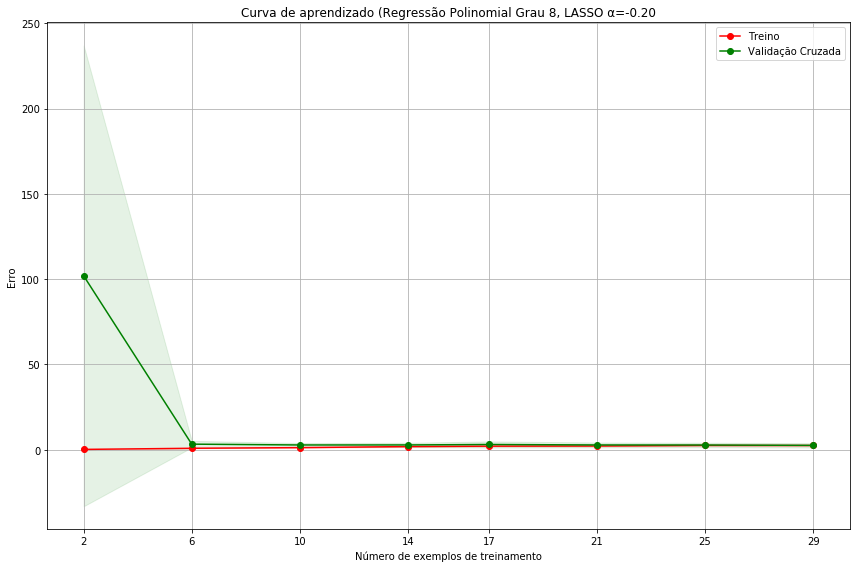

In [185]:
#variáveis do gráfico
#titulo = ''
#eixo_x = ''
#eixo_y = ''
image = path_image+'plot3.10.png'

#Verificado que valores positivos resultam em modelos não muito bons
lasso_reg = make_pipeline(PolynomialFeatures(8), StandardScaler(), Lasso(tol=0.1))
param_grid = {'lasso__alpha': -np.logspace(-2,2,50)}
cv = KFold(n_splits=10, shuffle=True, random_state=42)
grid= GridSearchCV(lasso_reg,param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')
grid.fit(X_combined,y_combined)

Lambda = grid.best_params_['lasso__alpha']
lasso = grid.best_estimator_
fig, ax = plt.subplots(figsize=(12,8))
plot_learning_curve(lasso, 'Curva de aprendizado (Regressão Polinomial Grau 8, LASSO \u03B1={:.2f}'.format(Lambda),X_combined, y_combined, train_sizes=np.linspace(0.1, 1, 8))


#salvar imagens
plt.savefig(image, dpi=300)
plt.tight_layout() ## ver se é necessário
plt.show()

In [186]:
# Analisando o melhor modelo no conjunto teste
lin_reg.fit(X_combined, y_combined)
linear.fit(X_combined, y_combined)

lin_score = np.sqrt(mean_squared_error(ytest, lin_reg.predict(Xtest[:, np.newaxis])))
poly_score = np.sqrt(mean_squared_error(ytest, linear.predict(Xtest[:, np.newaxis])))
ridge_score = np.sqrt(mean_squared_error(ytest, ridge.predict(Xtest[:, np.newaxis])))
lasso_score = np.sqrt(mean_squared_error(ytest, lasso.predict(Xtest[:, np.newaxis])))

In [187]:
print('RMSE dos modelos no conjunto teste:\n')
print('O RMSE Regressão Linear (sem regularização): {:.2f}'.format(lin_score))
print('O RMSE Regressão Polinomial (sem regularização): {:.2f}'.format(poly_score))
print('O RMSE RIDGE: {:.2f}'.format(ridge_score))
print('O RMSE LASSO: {:.2f}'.format(lasso_score))

RMSE dos modelos no conjunto teste:

O RMSE Regressão Linear (sem regularização): 6.69
O RMSE Regressão Polinomial (sem regularização): 7.94
O RMSE RIDGE: 2.95
O RMSE LASSO: 2.68


O overfitting foi solucionado, levando em consideração que o erro na validação cruzada tendensiou a ser igual ao erro no conjunto de treino ainda assim para uma quantidade pequena de amostras. O GridSearch com LASSO finalizou em um valor 𝜆 negativo para o melhor modelo e a tolerância foi aumentada para 0.1, por problemas de convergência.